SÉLECTION DE CARACTÉRISTIQUES - DÉTECTION ANOMALIES FINANCIÈRES
Dataset: Taiwanese Bankruptcy Prediction

1. CHARGEMENT DES DONNÉES NETTOYÉES
--------------------------------------------------------------------------------
✅ Données nettoyées chargées
Dimensions: (6819, 96)

Premières lignes:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                          -2.237820          
1          1                                          -0.650702          
2          1                                          -1.298101          
3          1                                          -1.742362          
4          1                                          -0.638315          

    ROA(A) before interest and % after tax  \
0                                -2.525674   
1                                -0.402644   
2                                -1.133706   
3                                -2.024403   
4                              

<Figure size 1200x800 with 0 Axes>

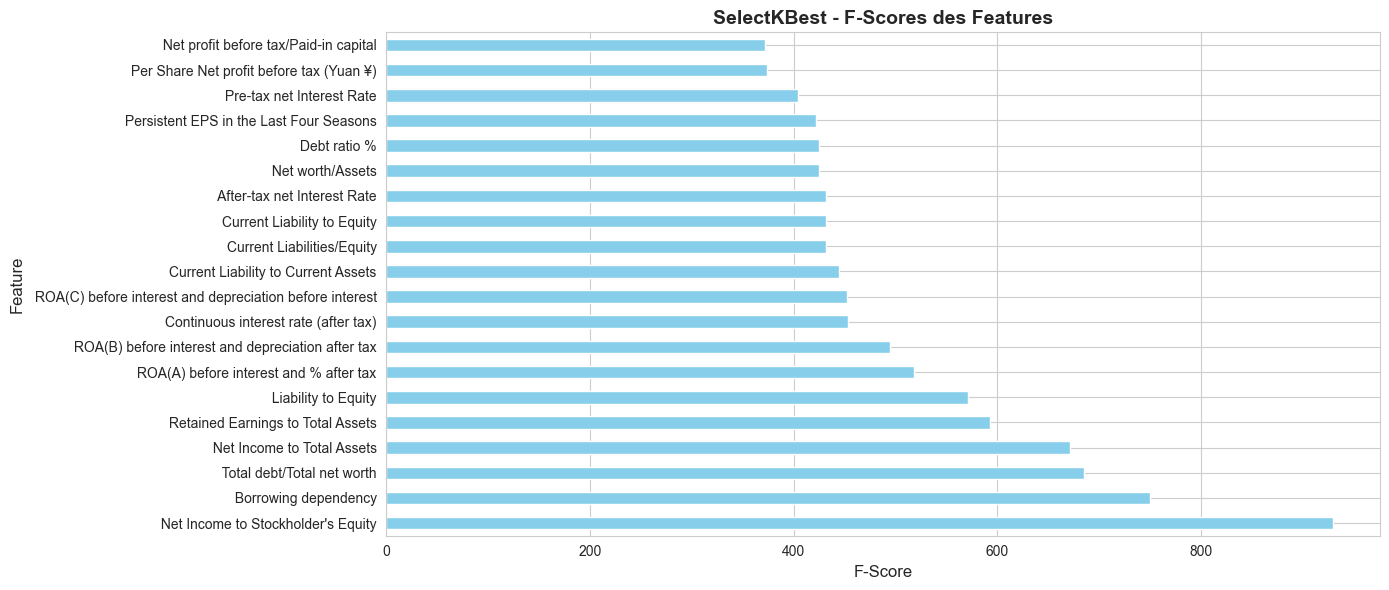


📋 20 features sélectionnées par SelectKBest

4. MÉTHODE 2: MUTUAL INFORMATION
--------------------------------------------------------------------------------

📊 Calcul de l'information mutuelle...

✅ Mutual Information calculée

Top 15 features selon MI Score:

                                  Feature  MI_Score
  Persistent EPS in the Last Four Seasons  0.040260
       Net Income to Stockholder's Equity  0.038213
    Net profit before tax/Paid-in capital  0.038035
 Per Share Net profit before tax (Yuan ¥)  0.037276
               Net Income to Total Assets  0.036878
   ROA(A) before interest and % after tax  0.036102
                     Borrowing dependency  0.035683
     Continuous interest rate (after tax)  0.035570
                             Debt ratio %  0.035461
                   Interest Expense Ratio  0.034654
                         Net worth/Assets  0.034284
               Total debt/Total net worth  0.033809
                      Liability to Equity  0.033707
       D

<Figure size 1200x800 with 0 Axes>

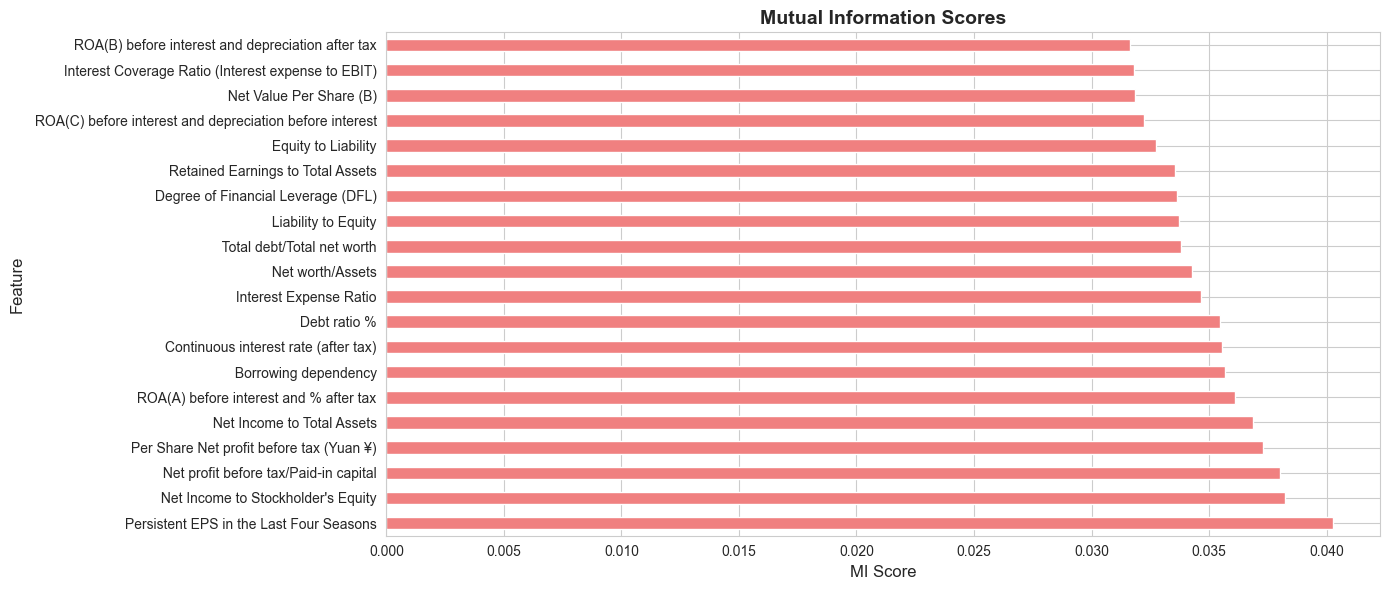


📋 20 features sélectionnées par Mutual Information

5. MÉTHODE 3: RECURSIVE FEATURE ELIMINATION (RFE)
--------------------------------------------------------------------------------

🔄 Application de RFE (peut prendre quelques minutes)...

✅ RFE appliqué avec succès

Top 15 features selon RFE (Ranking=1):

                                     Feature  Ranking
         Interest-bearing debt interest rate        1
                     Net Value Per Share (B)        1
 Non-industry income and expenditure/revenue        1
     Persistent EPS in the Last Four Seasons        1
                       Net Value Growth Rate        1
                        Borrowing dependency        1
                      Interest Expense Ratio        1
                                 Quick Ratio        1
             Fixed Assets Turnover Frequency        1
                           Cash/Total Assets        1
                   Inventory/Working Capital        1
       Net profit before tax/Paid-in capit

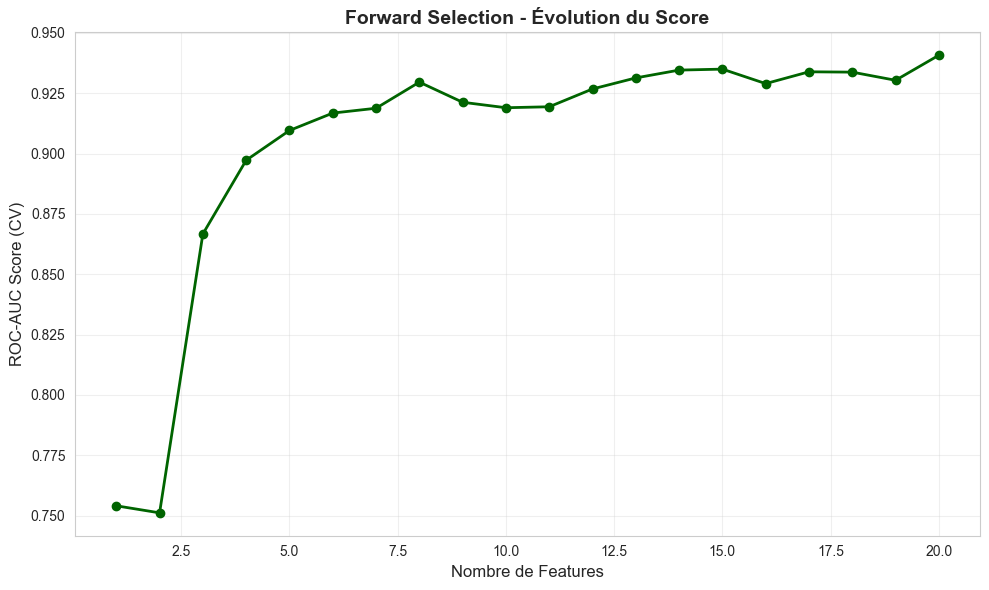


7. MÉTHODE 5: FEATURE IMPORTANCE (RANDOM FOREST)
--------------------------------------------------------------------------------

🌲 Entraînement Random Forest pour Feature Importance...

✅ Feature Importance calculée

Top 15 features par importance:

                                            Feature  Importance
                              Net Value Growth Rate    0.034521
                 Net Income to Stockholder's Equity    0.025130
            Persistent EPS in the Last Four Seasons    0.025071
                               Borrowing dependency    0.023692
              Net profit before tax/Paid-in capital    0.022207
                 Degree of Financial Leverage (DFL)    0.018407
                Interest-bearing debt interest rate    0.018175
                            Net Value Per Share (B)    0.017945
               Continuous interest rate (after tax)    0.017213
                                  Cash/Total Assets    0.016882
 Interest Coverage Ratio (Interest expense 

<Figure size 1200x800 with 0 Axes>

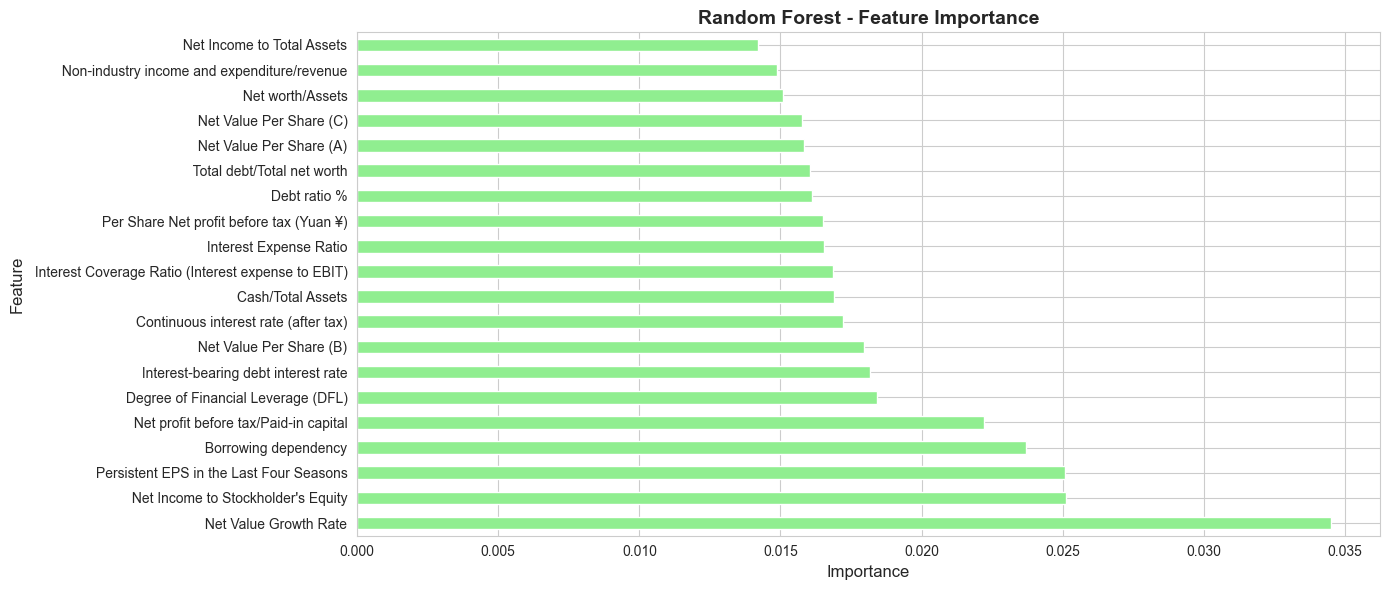


📋 20 features sélectionnées par Importance

8. COMPARAISON DES MÉTHODES DE SÉLECTION
--------------------------------------------------------------------------------

📊 Features sélectionnées par plusieurs méthodes:

                                                 Feature  Count
                                    Borrowing dependency      5
                                            Debt ratio %      5
                      Net Income to Stockholder's Equity      4
                              Net Income to Total Assets      4
                 Persistent EPS in the Last Four Seasons      4
                   Net profit before tax/Paid-in capital      4
                                  Interest Expense Ratio      4
                      Degree of Financial Leverage (DFL)      4
                              Total debt/Total net worth      3
                  ROA(A) before interest and % after tax      3
                    Continuous interest rate (after tax)      3
 ROA(C) before

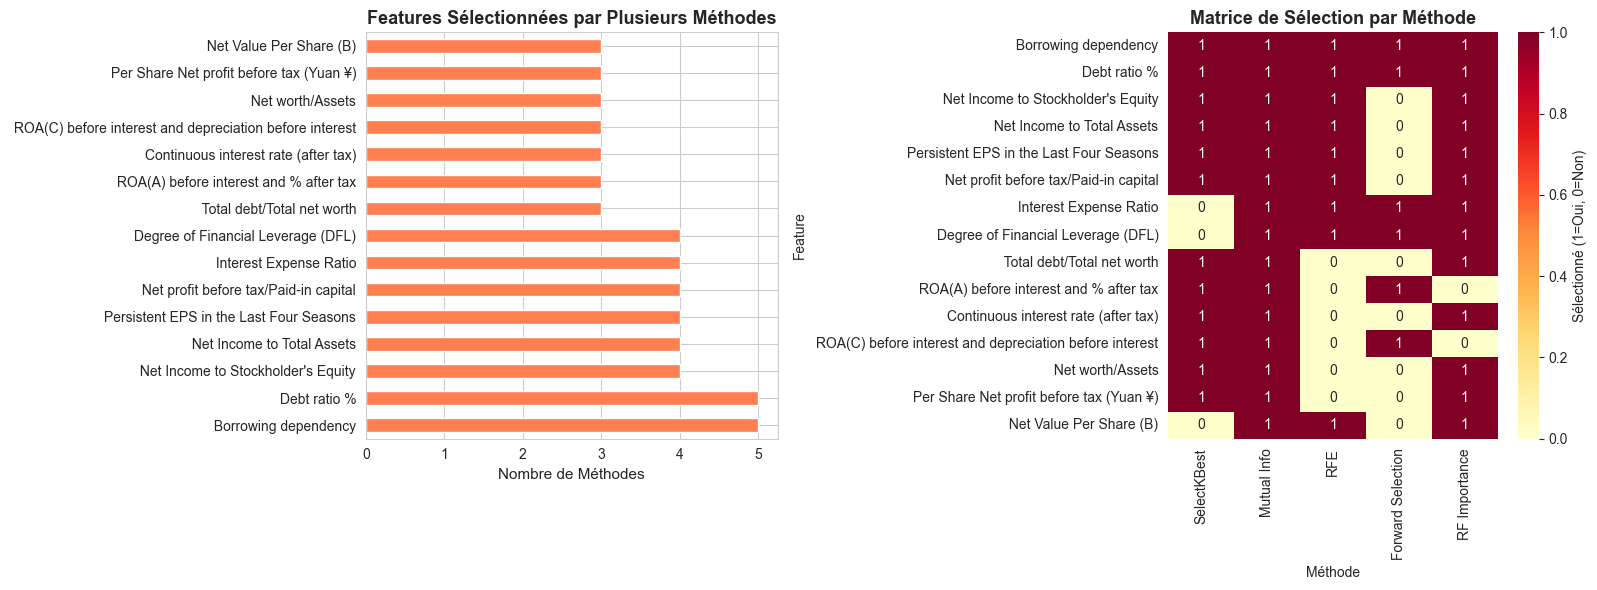


9. SÉLECTION FINALE DES FEATURES
--------------------------------------------------------------------------------

🎯 SÉLECTION FINALE:
   Critère: Features présentes dans ≥3 méthodes
   Features initiales: 95
   Features finales: 17
   Réduction: 82.1%

📋 Liste des features finales:

    1.  Borrowing dependency (sélectionnée 5x)
    2.  Debt ratio % (sélectionnée 5x)
    3.  Net Income to Stockholder's Equity (sélectionnée 4x)
    4.  Net Income to Total Assets (sélectionnée 4x)
    5.  Persistent EPS in the Last Four Seasons (sélectionnée 4x)
    6.  Net profit before tax/Paid-in capital (sélectionnée 4x)
    7.  Interest Expense Ratio (sélectionnée 4x)
    8.  Degree of Financial Leverage (DFL) (sélectionnée 4x)
    9.  Total debt/Total net worth (sélectionnée 3x)
   10.  ROA(A) before interest and % after tax (sélectionnée 3x)
   11.  Continuous interest rate (after tax) (sélectionnée 3x)
   12.  ROA(C) before interest and depreciation before interest (sélectionnée 3x)
   13.  Net

In [2]:
# ================================================================================
# NOTEBOOK 3: SÉLECTION DE CARACTÉRISTIQUES
# Dataset: Taiwanese Bankruptcy Prediction
# Fichier: notebooks/03_feature_selection.ipynb
# ================================================================================

"""
PROJET: Détection d'Anomalies Financières
Ce notebook implémente plusieurs techniques de sélection de features
pour identifier les variables les plus pertinentes pour prédire la faillite.

PRÉREQUIS: Avoir exécuté le notebook 02_cleaning.ipynb
"""

# ================================================================================
# IMPORTS
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import (
    SelectKBest, f_classif, mutual_info_classif,
    RFE, VarianceThreshold
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("SÉLECTION DE CARACTÉRISTIQUES - DÉTECTION ANOMALIES FINANCIÈRES")
print("Dataset: Taiwanese Bankruptcy Prediction")
print("=" * 80)

# ================================================================================
# 1. CHARGEMENT DES DONNÉES NETTOYÉES
# ================================================================================

print("\n1. CHARGEMENT DES DONNÉES NETTOYÉES")
print("-" * 80)

# Charger les données nettoyées du notebook 02
df = pd.read_csv('../data/cleaned/financial_data_cleaned.csv')

print(f"✅ Données nettoyées chargées")
print(f"Dimensions: {df.shape}")
print(f"\nPremières lignes:")
print(df.head())

# Séparer features et target
target_col = 'Bankrupt?'

if target_col in df.columns:
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    print(f"\n📊 Informations:")
    print(f"   Features: {X.shape[1]}")
    print(f"   Observations: {X.shape[0]:,}")
    print(f"   Target distribution: {dict(y.value_counts())}")
else:
    print(f"❌ ERREUR: Variable cible '{target_col}' non trouvée!")
    print(f"Colonnes disponibles: {df.columns.tolist()[:10]}...")
    raise KeyError(f"Variable cible '{target_col}' non trouvée")

# ================================================================================
# 2. SUPPRESSION DES FEATURES À FAIBLE VARIANCE
# ================================================================================

print("\n2. SUPPRESSION DES FEATURES À FAIBLE VARIANCE")
print("-" * 80)

# Les features avec très peu de variance n'apportent pas d'information
print("\n📊 Analyse de la variance...")

# Calculer la variance de chaque feature
variances = X.var()
low_variance_features = variances[variances < 0.01].index.tolist()

print(f"Features avec variance < 0.01: {len(low_variance_features)}")
if len(low_variance_features) > 0:
    print(f"Ces features seront exclues de l'analyse")
    X_filtered = X.drop(columns=low_variance_features)
else:
    X_filtered = X.copy()
    print("✅ Toutes les features ont une variance suffisante")

print(f"\nFeatures restantes: {X_filtered.shape[1]}")

# ================================================================================
# 3. MÉTHODE 1: SELECTKBEST (F-CLASSIF)
# ================================================================================

print("\n3. MÉTHODE 1: SELECTKBEST (F-CLASSIF)")
print("-" * 80)

# Sélectionner les K meilleures features selon le test F-ANOVA
k_best = min(20, X_filtered.shape[1])  # Top 20 features
print(f"\nSélection des {k_best} meilleures features...")

selector_kbest = SelectKBest(f_classif, k=k_best)
X_kbest = selector_kbest.fit_transform(X_filtered, y)

# Créer un DataFrame avec les scores
scores_kbest = pd.DataFrame({
    'Feature': X_filtered.columns,
    'F_Score': selector_kbest.scores_
}).sort_values('F_Score', ascending=False)

print(f"\n✅ SelectKBest appliqué")
print(f"\nTop 15 features selon F-Score:\n")
print(scores_kbest.head(15).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
scores_kbest.head(20).plot(x='Feature', y='F_Score', kind='barh', color='skyblue', legend=False)
plt.title('SelectKBest - F-Scores des Features', fontsize=14, fontweight='bold')
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../data/cleaned/feature_selection_kbest.png', dpi=300, bbox_inches='tight')
plt.show()

# Features sélectionnées
kbest_features = scores_kbest.head(k_best)['Feature'].tolist()
print(f"\n📋 {len(kbest_features)} features sélectionnées par SelectKBest")

# ================================================================================
# 4. MÉTHODE 2: MUTUAL INFORMATION
# ================================================================================

print("\n4. MÉTHODE 2: MUTUAL INFORMATION")
print("-" * 80)

print("\n📊 Calcul de l'information mutuelle...")

# Calculer l'information mutuelle entre chaque feature et la cible
mi_scores = mutual_info_classif(X_filtered, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(f"\n✅ Mutual Information calculée")
print(f"\nTop 15 features selon MI Score:\n")
print(mi_df.head(15).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
mi_df.head(20).plot(x='Feature', y='MI_Score', kind='barh', color='lightcoral', legend=False)
plt.title('Mutual Information Scores', fontsize=14, fontweight='bold')
plt.xlabel('MI Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../data/cleaned/feature_selection_mi.png', dpi=300, bbox_inches='tight')
plt.show()

# Features sélectionnées
mi_features = mi_df.head(k_best)['Feature'].tolist()
print(f"\n📋 {len(mi_features)} features sélectionnées par Mutual Information")

# ================================================================================
# 5. MÉTHODE 3: RECURSIVE FEATURE ELIMINATION (RFE)
# ================================================================================

print("\n5. MÉTHODE 3: RECURSIVE FEATURE ELIMINATION (RFE)")
print("-" * 80)

print(f"\n🔄 Application de RFE (peut prendre quelques minutes)...")

# RFE avec Random Forest comme estimateur
estimator = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe = RFE(estimator, n_features_to_select=k_best, step=5)

rfe.fit(X_filtered, y)

# Features sélectionnées
rfe_features = X_filtered.columns[rfe.support_].tolist()

# Ranking de toutes les features
rfe_ranking = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(f"\n✅ RFE appliqué avec succès")
print(f"\nTop 15 features selon RFE (Ranking=1):\n")
print(rfe_ranking.head(15).to_string(index=False))

print(f"\n📋 {len(rfe_features)} features sélectionnées par RFE")

# ================================================================================
# 6. MÉTHODE 4: FORWARD SELECTION
# ================================================================================

print("\n6. MÉTHODE 4: FORWARD SELECTION")
print("-" * 80)

def forward_selection(X, y, max_features=20):
    """
    Sélection forward: ajoute itérativement la feature qui améliore le plus le score
    """
    selected = []
    remaining = list(X.columns)
    best_scores = []
    
    print(f"\n🔄 Forward Selection en cours...")
    print("Progression:")
    
    for i in range(min(max_features, len(remaining))):
        best_score = 0
        best_feature = None
        
        # Tester chaque feature restante
        for feature in remaining:
            current = selected + [feature]
            X_subset = X[current]
            
            # Évaluer avec cross-validation
            model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
            scores = cross_val_score(model, X_subset, y, cv=3, scoring='roc_auc', n_jobs=-1)
            score = scores.mean()
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            selected.append(best_feature)
            remaining.remove(best_feature)
            best_scores.append(best_score)
            
            # Afficher progression tous les 5 steps
            if (i + 1) % 5 == 0 or i == 0:
                print(f"  Step {i+1}: {best_feature[:50]}... (AUC={best_score:.4f})")
    
    return selected, best_scores

# Exécuter forward selection
forward_features, forward_scores = forward_selection(X_filtered, y, max_features=k_best)

print(f"\n✅ Forward Selection terminé")
print(f"\n📋 {len(forward_features)} features sélectionnées")

# Visualisation de la progression
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_scores)+1), forward_scores, 'o-', 
         linewidth=2, markersize=6, color='darkgreen')
plt.xlabel('Nombre de Features', fontsize=12)
plt.ylabel('ROC-AUC Score (CV)', fontsize=12)
plt.title('Forward Selection - Évolution du Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/cleaned/forward_selection_progression.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 7. MÉTHODE 5: FEATURE IMPORTANCE (RANDOM FOREST)
# ================================================================================

print("\n7. MÉTHODE 5: FEATURE IMPORTANCE (RANDOM FOREST)")
print("-" * 80)

print("\n🌲 Entraînement Random Forest pour Feature Importance...")

# Entraîner Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_filtered, y)

# Obtenir les importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(f"\n✅ Feature Importance calculée")
print(f"\nTop 15 features par importance:\n")
print(importance_df.head(15).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
importance_df.head(20).plot(x='Feature', y='Importance', kind='barh', 
                            color='lightgreen', legend=False)
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../data/cleaned/feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

# Features sélectionnées
importance_features = importance_df.head(k_best)['Feature'].tolist()
print(f"\n📋 {len(importance_features)} features sélectionnées par Importance")

# ================================================================================
# 8. COMPARAISON DES MÉTHODES
# ================================================================================

print("\n8. COMPARAISON DES MÉTHODES DE SÉLECTION")
print("-" * 80)

# Dictionnaire avec toutes les sélections
methods = {
    'SelectKBest': kbest_features,
    'Mutual Info': mi_features,
    'RFE': rfe_features,
    'Forward Selection': forward_features,
    'RF Importance': importance_features
}

# Compter combien de fois chaque feature apparaît
all_features = []
for features in methods.values():
    all_features.extend(features)

feature_counts = Counter(all_features)
common_features_df = pd.DataFrame(
    feature_counts.most_common(30),
    columns=['Feature', 'Count']
)

print("\n📊 Features sélectionnées par plusieurs méthodes:\n")
print(common_features_df.head(20).to_string(index=False))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot des features les plus sélectionnées
common_features_df.head(15).plot(x='Feature', y='Count', kind='barh', 
                                  ax=axes[0], color='coral', legend=False)
axes[0].set_title('Features Sélectionnées par Plusieurs Méthodes', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Nombre de Méthodes', fontsize=11)
axes[0].set_ylabel('')

# Heatmap de présence
top_features = common_features_df['Feature'].head(15).tolist()
presence_matrix = pd.DataFrame(0, index=top_features, columns=methods.keys())

for method_name, features in methods.items():
    for feature in features:
        if feature in presence_matrix.index:
            presence_matrix.loc[feature, method_name] = 1

sns.heatmap(presence_matrix, annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[1], cbar_kws={'label': 'Sélectionné (1=Oui, 0=Non)'})
axes[1].set_title('Matrice de Sélection par Méthode', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Méthode')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.savefig('../data/cleaned/feature_selection_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 9. SÉLECTION FINALE DES FEATURES
# ================================================================================

print("\n9. SÉLECTION FINALE DES FEATURES")
print("-" * 80)

# Critère: features sélectionnées par au moins 3 méthodes sur 5
threshold = 3
final_features = common_features_df[common_features_df['Count'] >= threshold]['Feature'].tolist()

print(f"\n🎯 SÉLECTION FINALE:")
print(f"   Critère: Features présentes dans ≥{threshold} méthodes")
print(f"   Features initiales: {X.shape[1]}")
print(f"   Features finales: {len(final_features)}")
print(f"   Réduction: {(1 - len(final_features)/X.shape[1])*100:.1f}%")

print(f"\n📋 Liste des features finales:\n")
for i, feature in enumerate(final_features, 1):
    count = common_features_df[common_features_df['Feature'] == feature]['Count'].values[0]
    print(f"   {i:2d}. {feature[:60]} (sélectionnée {count}x)")

# ================================================================================
# 10. CRÉATION DU DATASET AVEC FEATURES SÉLECTIONNÉES
# ================================================================================

print("\n10. SAUVEGARDE DU DATASET AVEC FEATURES SÉLECTIONNÉES")
print("-" * 80)

# Créer le dataset avec features sélectionnées
X_selected = X[final_features]
df_selected = pd.concat([X_selected, y], axis=1)

print(f"\n📊 Dataset final:")
print(f"   Dimensions: {df_selected.shape}")
print(f"   Features: {X_selected.shape[1]}")
print(f"   Target: {target_col}")

# Sauvegarder
df_selected.to_csv('../data/cleaned/financial_data_selected_features.csv', index=False)
print(f"\n✅ Dataset sauvegardé: ../data/cleaned/financial_data_selected_features.csv")

# Sauvegarder la liste des features
with open('../data/cleaned/selected_features.txt', 'w') as f:
    f.write('\n'.join(final_features))
print(f"✅ Liste des features: ../data/cleaned/selected_features.txt")

# Statistiques des features sélectionnées
print(f"\n📈 Statistiques des features sélectionnées:")
print(X_selected.describe())

# ================================================================================
# 11. RÉSUMÉ ET RAPPORT
# ================================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ DE LA SÉLECTION DE FEATURES")
print("=" * 80)

summary = f"""
RAPPORT DE SÉLECTION DE CARACTÉRISTIQUES
========================================
Dataset: Taiwanese Bankruptcy Prediction
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

DONNÉES INITIALES:
-----------------
• Observations: {X.shape[0]:,}
• Features totales: {X.shape[1]}
• Variable cible: {target_col}

MÉTHODES APPLIQUÉES:
-------------------
1. SelectKBest (F-test ANOVA)
2. Mutual Information
3. RFE (Recursive Feature Elimination)
4. Forward Selection
5. Random Forest Feature Importance

PARAMÈTRES:
----------
• Top K features par méthode: {k_best}
• Critère de sélection finale: ≥{threshold} méthodes

RÉSULTAT FINAL:
--------------
• Features sélectionnées: {len(final_features)}
• Réduction: {(1 - len(final_features)/X.shape[1])*100:.1f}%
• Features par méthode:
  - SelectKBest: {len(kbest_features)}
  - Mutual Info: {len(mi_features)}
  - RFE: {len(rfe_features)}
  - Forward Selection: {len(forward_features)}
  - RF Importance: {len(importance_features)}

TOP 10 FEATURES FINALES:
-----------------------
{chr(10).join(f"  {i+1:2d}. {feat}" for i, feat in enumerate(final_features[:10]))}

FEATURES LES PLUS CONSENSUELLES:
-------------------------------
{chr(10).join(f"  • {row['Feature'][:60]} (sélectionnée {row['Count']}x)" 
              for _, row in common_features_df.head(5).iterrows())}

FICHIERS GÉNÉRÉS:
----------------
✓ financial_data_selected_features.csv ({df_selected.shape[0]:,} × {df_selected.shape[1]})
✓ selected_features.txt (liste des {len(final_features)} features)
✓ Graphiques de comparaison:
  - feature_selection_kbest.png
  - feature_selection_mi.png
  - forward_selection_progression.png
  - feature_importance_rf.png
  - feature_selection_comparison.png

AVANTAGES DE LA RÉDUCTION:
--------------------------
✓ Moins de features = modèles plus rapides
✓ Réduction du risque de sur-apprentissage (overfitting)
✓ Meilleure interprétabilité des modèles
✓ Élimination du bruit et des features redondantes
✓ Focus sur les ratios financiers les plus prédictifs

INTERPRÉTATION:
--------------
Les features finales représentent les ratios financiers les plus
discriminants pour prédire le risque de faillite. Ces indicateurs
ont été validés par plusieurs méthodes statistiques indépendantes.

PROCHAINE ÉTAPE:
---------------
→ Notebook 04: Réduction de dimensionnalité (04_dimensionality_reduction.ipynb)
  Utiliser: financial_data_selected_features.csv
"""

print(summary)

# Sauvegarder le rapport
with open('../data/cleaned/feature_selection_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✅ Sélection de features terminée avec succès!")
print("📄 Rapport sauvegardé: ../data/cleaned/feature_selection_report.txt")
print("=" * 80)